# Generate noisy realizations of P1D mocks

This notebook explains how to generate noisy realizations of P1D mocks

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 160
mpl.rcParams['figure.dpi'] = 160
from lace.archive import gadget_archive, nyx_archive
from cup1d.data.data_eBOSS_mock import P1D_eBOSS_mock
from cup1d.data.data_gadget import Gadget_P1D
from cup1d.data.data_nyx import Nyx_P1D

## Generate eBOSS P1D mock

#### Fiducial

Nz = 13 , Nk = 35


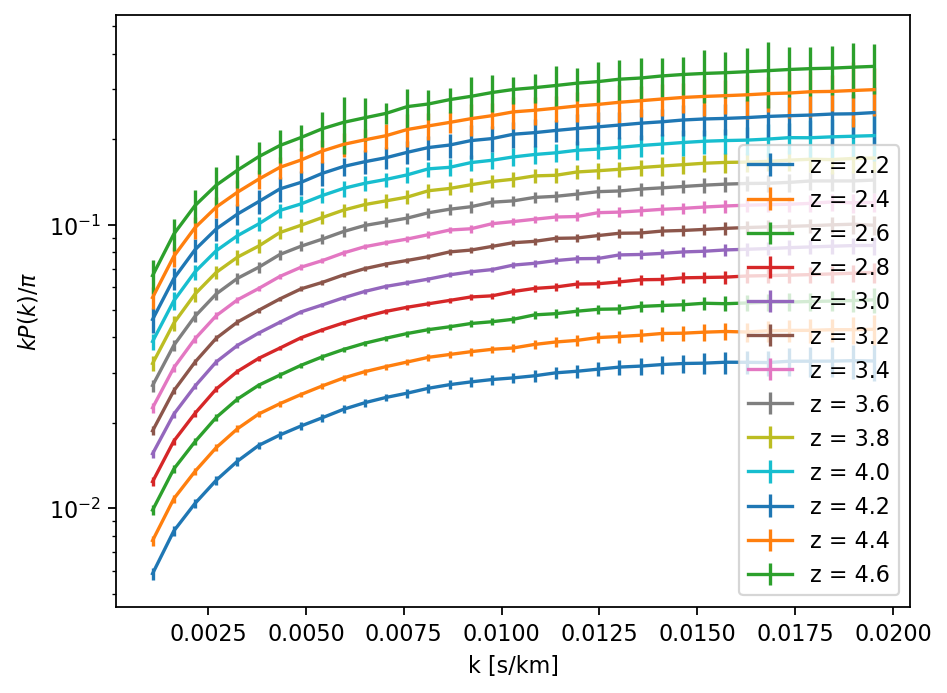

In [2]:
eBOSS_mock =P1D_eBOSS_mock(add_noise=False)
eBOSS_mock.plot_p1d()

#### Generate mock by perturbing values accoring to the cov matrix

Nz = 13 , Nk = 35


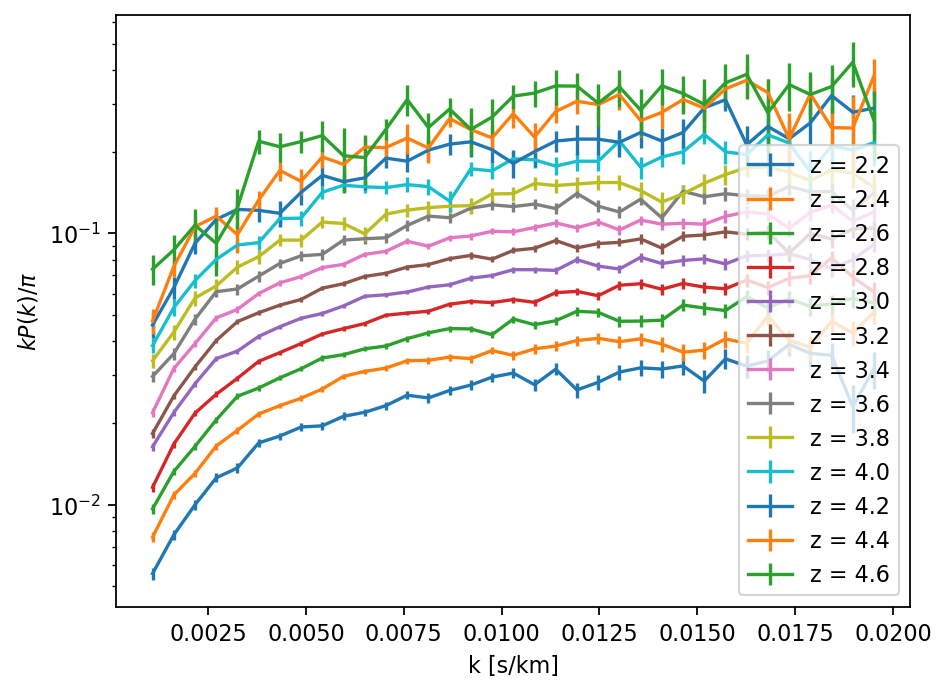

In [3]:
eBOSS_mock =P1D_eBOSS_mock(add_noise=True, seed=0)
eBOSS_mock.plot_p1d()

### Generate gadget mock

In [4]:
mpg_archive = gadget_archive.GadgetArchive(postproc='Cabayol23')

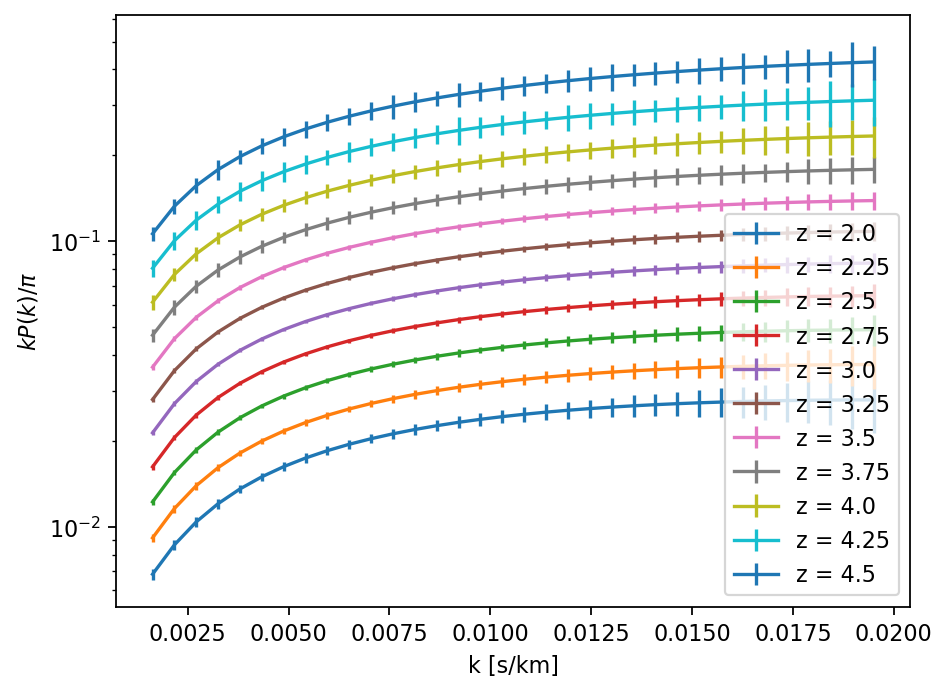

In [5]:
mpg_mock = Gadget_P1D(archive=mpg_archive, input_sim="mpg_central", add_noise=False)
mpg_mock.plot_p1d()

#### with noise

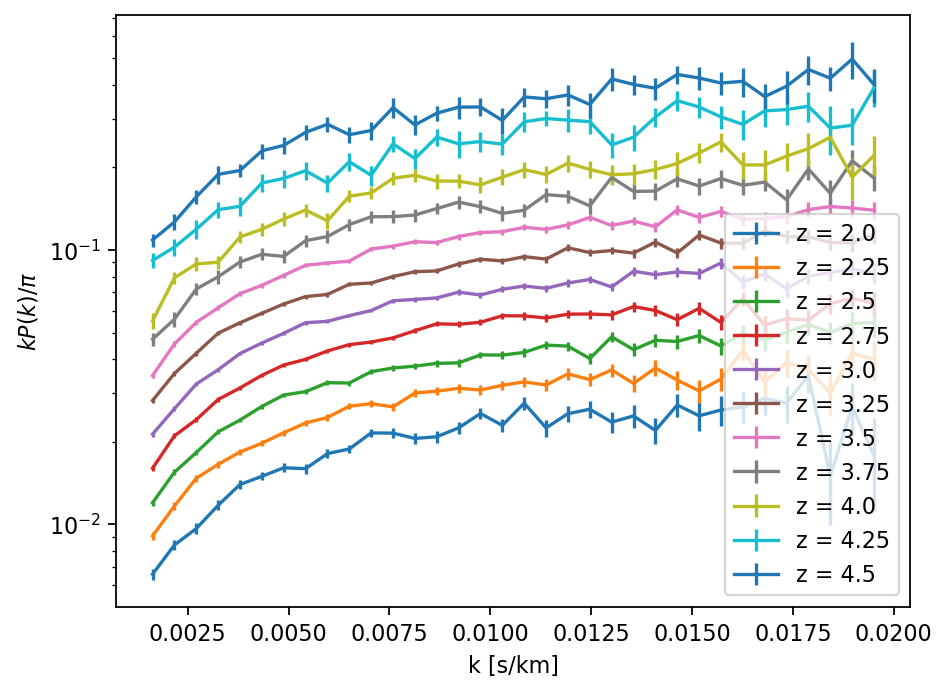

In [6]:
mpg_mock =Gadget_P1D(archive=mpg_archive, input_sim="mpg_central", add_noise=True)
mpg_mock.plot_p1d()

## Check that we converge to fiducial P1D

#### Generate random realizations and plot

Nz = 13 , Nk = 35


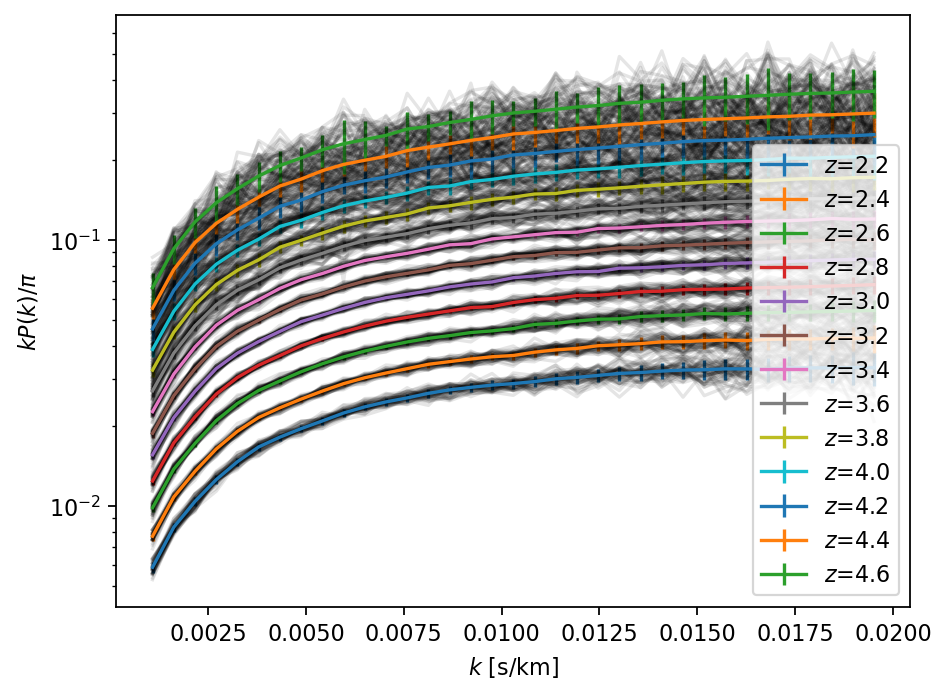

In [7]:
nsamples = 50
eBOSS_mock = P1D_eBOSS_mock(add_noise=False)
realization = eBOSS_mock.get_Pk_iz_perturbed(eBOSS_mock.Pk_kms, eBOSS_mock.cov_Pk_kms, nsamples=nsamples)
for iz in range(len(eBOSS_mock.z)):
    k = eBOSS_mock.k_kms
    norm = k/np.pi
    orig = eBOSS_mock.Pk_kms[iz]    
    err = np.sqrt(np.diag(eBOSS_mock.cov_Pk_kms[iz]))
    plt.errorbar(k, norm * orig, norm * err, label=r'$z$='+str(eBOSS_mock.z[iz]))
    for jj in range(nsamples):
        plt.plot(k, norm * realization[iz][jj], 'k', alpha=0.1)
    

plt.xlabel(r'$k$ [s/km]')
plt.ylabel(r'$k P(k)/\pi$')
plt.yscale('log')
plt.legend()

#### Compare median and error-bars

Nz = 13 , Nk = 35


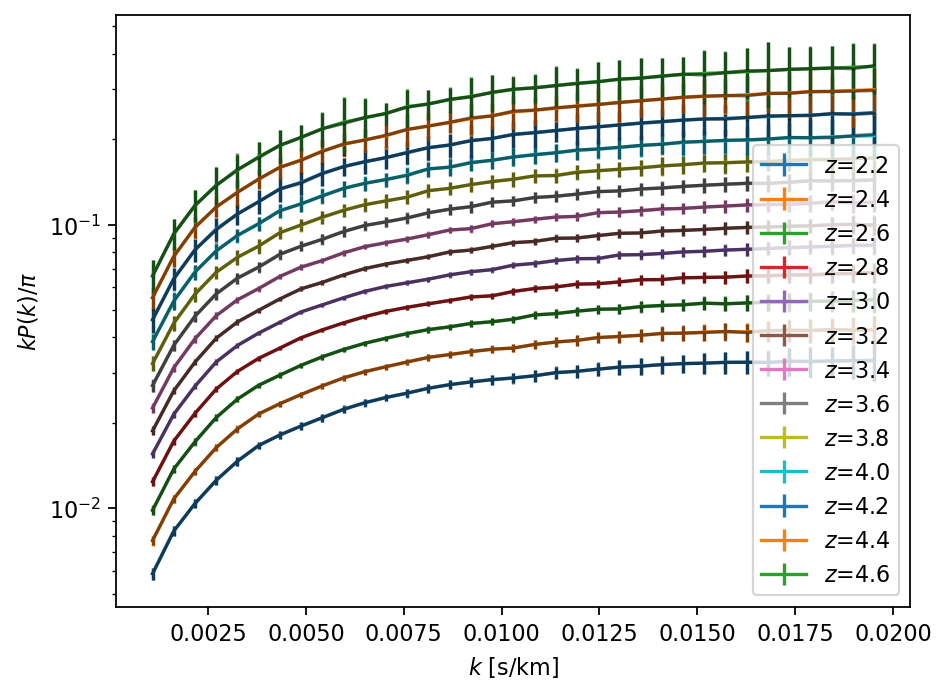

In [8]:
nsamples = 1000
eBOSS_mock = P1D_eBOSS_mock(add_noise=False)
realization = eBOSS_mock.get_Pk_iz_perturbed(eBOSS_mock.Pk_kms, eBOSS_mock.cov_Pk_kms, nsamples=nsamples)
for iz in range(len(eBOSS_mock.z)):
    k = eBOSS_mock.k_kms
    norm = k/np.pi
    orig = eBOSS_mock.Pk_kms[iz]    
    err = np.sqrt(np.diag(eBOSS_mock.cov_Pk_kms[iz]))
    plt.errorbar(k, norm * orig, norm * err, label=r'$z$='+str(eBOSS_mock.z[iz]))
    
    yy = np.mean(realization[iz], axis=0)
    err_yy = np.std(realization[iz], axis=0)
    plt.errorbar(k, norm * yy, norm * err_yy, c='k', alpha=0.5)
    

plt.xlabel(r'$k$ [s/km]')
plt.ylabel(r'$k P(k)/\pi$')
plt.yscale('log')
plt.legend()